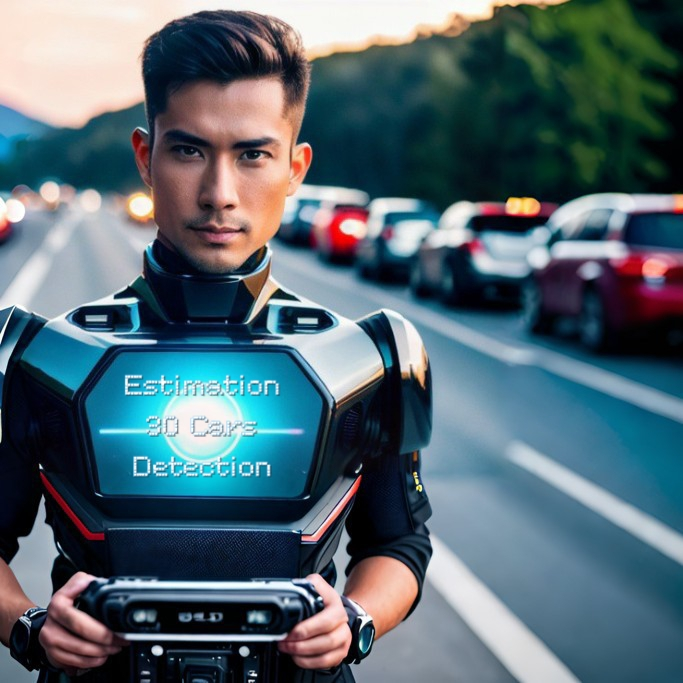## **Multi Deteksi Mobil**

**Deteksi mobil dengan jumlah banyak dengan  estimasi kemirip an bagian depan mobil . Disini saya ari akan membuat contoh deteksi dari gambar hasil capture TV Berita dalam informasi arus kemacetan libur tahun baru di Jalan Tol**

In [ ]:
# Import Modules
import cv2
import requests
import numpy as np

from PIL import Image

#### Capture Gambar 👇

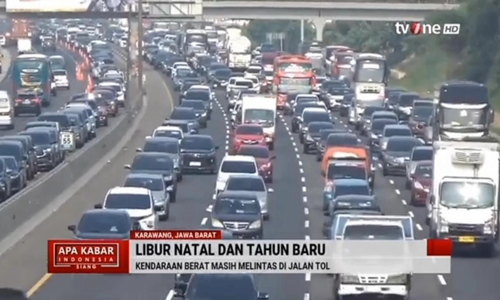

In [ ]:
# Reading Image for Cars
car_img = Image.open(
    '/content/car.jpg')
car_img.save('/content/car.jpg')
car_img.resize((500, 300))


## Pemrosesan A.I. Pada Capture 👇

Langkah-langkah untuk mendeteksi kendaraan:

- pengubahan gambar menjadi skala abu-abu.
- Penerapan Gaussian Blur untuk menghilangkan noise.
- Terapkan transformasi morfologi melingkar untuk menutup lubang pada objek latar depan
- Mendeteksi kendaraan pada gambar menggunakan extensi cascades xml

In [ ]:
def DetectVehicles(img, cascade):
    # Preprocessing the Image
    img_processed = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_processed = cv2.GaussianBlur(img_processed, (5, 5), 0)
    img_processed = cv2.dilate(img_processed, np.ones((3, 3)))

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
    img_processed = cv2.morphologyEx(img_processed, cv2.MORPH_CLOSE, kernel)

    # Detecting Vehicles with Cascade
    vehicles = cascade.detectMultiScale(img_processed, 1.1, 1)

    # Drawing Rectangles in original image
    for (x, y, w, h) in vehicles:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Return result along with number of vehicles
    return img, len(vehicles)


Estimated 60 Cars Detected


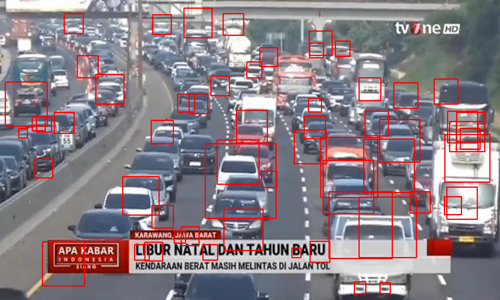

In [ ]:
# @title
# Detect Cars in car_img
car_img = np.array(car_img)
car_img, count = DetectVehicles(car_img, cv2.CascadeClassifier('/content/cars.xml'))

print(f'Estimated {count} Cars Detected')

car_img = Image.fromarray(car_img)
car_img.resize((500, 300))
